# Can you predict the strength of concrete?

## 📖 Background
You work in the civil engineering department of a major university. You are part of a project testing the strength of concrete samples. 

Concrete is the most widely used building material in the world. It is a mix of cement and water with gravel and sand. It can also include other materials like fly ash, blast furnace slag, and additives. 

The compressive strength of concrete is a function of components and age, so your team is testing different combinations of ingredients at different time intervals. 

The project leader asked you to find a simple way to estimate strength so that students can predict how a particular sample is expected to perform.

## 💾 The data
The team has already tested more than a thousand samples ([source](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength)):

#### Compressive strength data:
- "cement" - Portland cement in kg/m3
- "slag" - Blast furnace slag in kg/m3
- "fly_ash" - Fly ash in kg/m3
- "water" - Water in liters/m3
- "superplasticizer" - Superplasticizer additive in kg/m3
- "coarse_aggregate" - Coarse aggregate (gravel) in kg/m3
- "fine_aggregate" - Fine aggregate (sand) in kg/m3
- "age" - Age of the sample in days
- "strength" - Concrete compressive strength in megapascals (MPa)

***Acknowledgments**: I-Cheng Yeh, "Modeling of strength of high-performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998)*.

In [61]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/concrete_data.csv')
df.head(30)

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


## 💪 Challenge
Provide your project leader with a formula that estimates the compressive strength. Include:

1. The average strength of the concrete samples at 1, 7, 14, and 28 days of age.
2. The coefficients $\beta_{0}$, $\beta_{1}$ ... $\beta_{8}$, to use in the following formula:

$$ Concrete \ Strength = \beta_{0} \ + \ \beta_{1}*cement \ + \ \beta_{2}*slag \ + \ \beta_{3}*fly \ ash  \ + \ \beta_{4}*water \ + $$ 
$$ \beta_{5}*superplasticizer \ + \ \beta_{6}*coarse \ aggregate \ + \ \beta_{7}*fine \ aggregate \ + \ \beta_{8}*age $$

## 🧑‍⚖️ Judging criteria

This is a community-based competition. The top 5 most upvoted entries will win.

The winners will receive DataCamp merchandise.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your work.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [62]:

df.describe()




,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   fly_ash           1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarse_aggregate  1030 non-null   float64
 6   fine_aggregate    1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [64]:
df.shape

(1030, 9)

In [65]:
X_features = df.drop(['strength'],axis = 1)
y_target = df['strength']

In [66]:
X_features.shape

(1030, 8)

In [67]:
y_target.shape

(1030,)

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(X_features,y_target,test_size = 0.2, random_state = 0)

In [69]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [70]:
from sklearn.metrics import mean_squared_error
accuracy = dec_tree.score(x_test, y_test)
y_pred =dec_tree.predict(x_test)

print("Accuracy for decision tree regressor:",accuracy)
print("Mean Squared Error for decision tree regressor:",mean_squared_error(y_test, y_pred))
print("Square Root Mean Squared Error for decision tree regressor:",np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy for decision tree regressor: 0.7790422993627737
Mean Squared Error for decision tree regressor: 58.19678796735744
Square Root Mean Squared Error for decision tree regressor: 7.628681928574387


In [71]:
print('Actual:',y_test.values[0:30])
print('Prediction dec_tree_reg:',y_pred[0:30])

Actual: [26.0621928  10.35455057 79.29663476 74.98740976  9.69472204 47.09810556
 58.99846132 22.7182342  61.88736576 52.1243856  17.54026944 48.15300384
 38.32797084 17.20035777 56.83350668 55.25460664 33.35684888 34.6806428
 52.61391356 39.94134468 61.45989064 27.62730332 32.90179472 41.63745564
 17.54026944 26.84819544 66.89985628 21.0634918  61.06688932 66.9481196 ]
Prediction dec_tree_reg: [12.63809508  7.50701469 79.29663476 56.3991368   4.90355331 47.64623898
 69.83702404 19.41564416 79.98611076 56.14196225 17.57612219 40.38950408
 29.44751996 12.37264682 68.29949256 56.14403068 42.29245784 35.76312012
 59.76377968 34.73580088 56.33708396 26.94472208 21.50475644 59.76377968
 14.54104884 25.17966352 60.2946762  31.35047372 56.14403068 66.82401392]


In [72]:
from sklearn.ensemble import RandomForestRegressor

rnd_reg = RandomForestRegressor()
rnd_reg.fit(x_train,y_train)

RandomForestRegressor()

In [73]:
accuracy_rnd = rnd_reg.score(x_test, y_test)
pred = rnd_reg.predict(x_test)

print("Accuracy for random forest regressor:",accuracy_rnd)
print("Mean Squared Error for random forest regressor:",mean_squared_error(y_test, pred))
print("Square root Mean Squared Error for random forest regressor:",np.sqrt(mean_squared_error(y_test, pred)))

Accuracy for random forest regressor: 0.9194483599424333
Mean Squared Error for random forest regressor: 21.216036840235407
Square root Mean Squared Error for random forest regressor: 4.60608693363851


In [74]:

print('Actual value:',y_test.values[0:30])
print('Prediction rnd_for_reg:',pred[0:30])

Actual value: [26.0621928  10.35455057 79.29663476 74.98740976  9.69472204 47.09810556
 58.99846132 22.7182342  61.88736576 52.1243856  17.54026944 48.15300384
 38.32797084 17.20035777 56.83350668 55.25460664 33.35684888 34.6806428
 52.61391356 39.94134468 61.45989064 27.62730332 32.90179472 41.63745564
 17.54026944 26.84819544 66.89985628 21.0634918  61.06688932 66.9481196 ]
Prediction rnd_for_reg: [22.9641959   7.86090302 79.24968144 61.66451628 11.30769598 49.31907914
 60.61479301 23.65226734 73.34739457 51.19553929 18.57090506 42.54097257
 34.91773981 14.72968947 51.88658533 54.88746166 40.05628033 34.99234111
 51.90025074 38.26582837 60.24527114 28.26940542 27.29283851 38.70822276
 16.24010386 25.51912013 64.30033969 25.78261028 57.31433838 61.08840097]


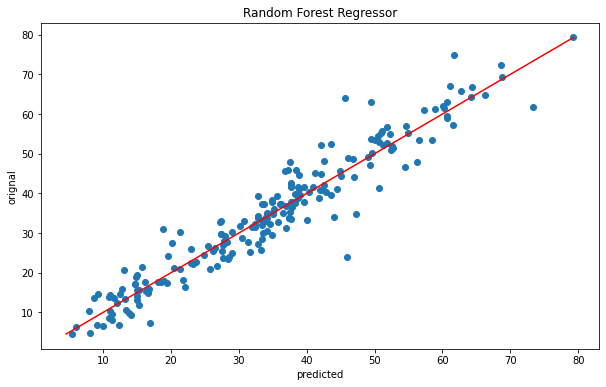

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,6])
plt.scatter(pred, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.title('Random Forest Regressor')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

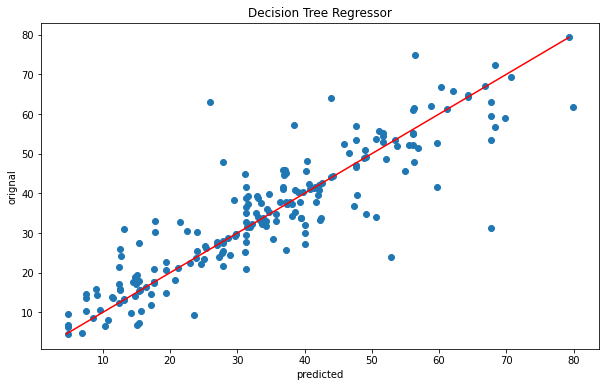

In [78]:
plt.figure(figsize=[10,6])
plt.scatter(y_pred, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.title('Decision Tree Regressor')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()